In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow as tf
print("TensorFlow:", tf.__version__)
print("GPU devices:", tf.config.list_physical_devices('GPU'))


2025-09-26 12:03:47.764598: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758888227.999011      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758888228.067685      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorFlow: 2.18.0
GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [2]:
import torch
print(torch.cuda.is_available())


True


In [3]:
 
print("GPU devices:", tf.config.list_physical_devices('GPU'))


GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [4]:
import os

base_dir = "/kaggle/input/brain-tumor-mri-dataset"
print("Var mı?:", os.path.exists(base_dir))
if os.path.exists(base_dir):
    print("İçindekiler:", os.listdir(base_dir))


Var mı?: True
İçindekiler: ['Training', 'Testing']


In [5]:
import os

base_dir = "/kaggle/input/brain-tumor-mri-dataset"
print("İçindekiler:", os.listdir(base_dir))

train_dir = os.path.join(base_dir, "Training")
test_dir = os.path.join(base_dir, "Testing")

print("Training klasörleri:", os.listdir(train_dir))
print("Testing klasörleri:", os.listdir(test_dir))


İçindekiler: ['Training', 'Testing']
Training klasörleri: ['pituitary', 'notumor', 'meningioma', 'glioma']
Testing klasörleri: ['pituitary', 'notumor', 'meningioma', 'glioma']


### 📂 Veri Seti Klasörlerinin İncelenmesi

Bu hücrede, **beyin tümörü MRI veri setinin** dizin yapısı kontrol edilmektedir.  
- `base_dir` değişkeni ile veri setinin temel yolu tanımlanır.  
- `os.listdir()` fonksiyonu kullanılarak ana klasördeki alt klasörler listelenir.  
- Daha sonra **Training** (eğitim) ve **Testing** (test) klasörlerinin içerikleri yazdırılır.  

Bu sayede, veri setindeki sınıflar (örneğin: `glioma`, `meningioma`, `pituitary`, `no_tumor`) görüntülenebilir.

In [6]:
import glob

for category in os.listdir(train_dir):
    files = glob.glob(os.path.join(train_dir, category, "*"))
    print(f"{category} (train): {len(files)} görüntü")


pituitary (train): 1457 görüntü
notumor (train): 1595 görüntü
meningioma (train): 1339 görüntü
glioma (train): 1321 görüntü


### 🧠 Eğitim Verilerinin Sınıf Dağılımı

Bu hücrede, **Training** klasöründeki her bir sınıfa ait görüntü sayısı hesaplanmaktadır.  
- `os.listdir(train_dir)` ifadesi ile her bir sınıf (örneğin: `glioma`, `meningioma`, `pituitary`, `no_tumor`) listelenir.  
- `glob.glob()` fonksiyonu, her sınıf klasöründeki tüm görüntü dosyalarını bulur.  
- Her sınıfın sahip olduğu görüntü sayısı ekrana yazdırılır.

Bu sayede, veri setinin **dengesiz** (imbalanced) olup olmadığını hızlıca görebiliriz.


### 🖼️ Eğitim Verilerinden Örnek Görsellerin Görselleştirilmesi

Bu hücrede, **Training** klasöründeki her bir sınıftan rastgele birer görüntü seçilerek görselleştirme yapılmaktadır.

- `os.listdir(train_dir)` ile sınıf isimleri alınır.  
- `random.choice()` fonksiyonu ile her sınıftan rastgele bir görüntü seçilir.  
- `matplotlib` kütüphanesi kullanılarak her bir sınıfın örnek görseli 2x2 subplot halinde gösterilir.  
- Görsellerin başlıklarında sınıf isimleri yer alır.  

Bu görselleştirme, veri setinin yapısını ve sınıflar arasındaki görsel farklılıkları anlamak için faydalıdır.


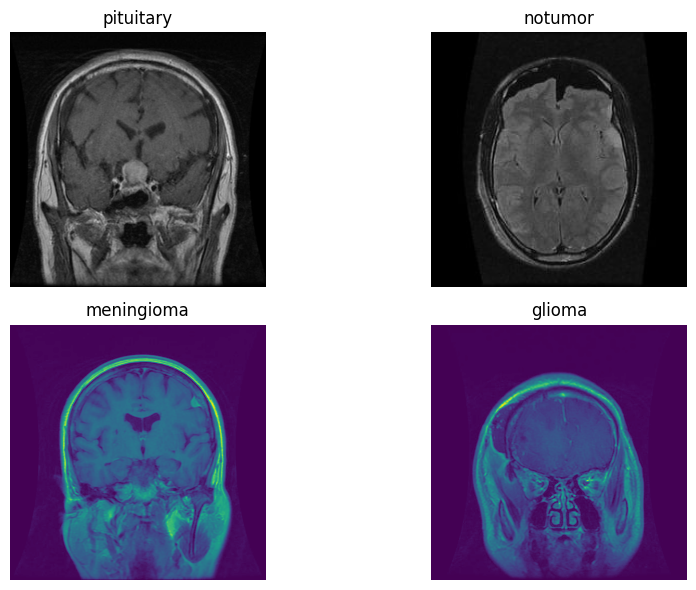

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

plt.figure(figsize=(10,6))
for i, category in enumerate(os.listdir(train_dir)):
    img_path = random.choice(glob.glob(os.path.join(train_dir, category, "*")))
    img = mpimg.imread(img_path)
    plt.subplot(2,2,i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()


In [8]:
import glob, pandas as pd
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir,d))]
print("Classes:", classes)

filepaths = []
labels = []
for c in classes:
    files = glob.glob(os.path.join(base_dir, c, "*"))
    for f in files:
        filepaths.append(f)
        labels.append(c)

df = pd.DataFrame({"path": filepaths, "label": labels})
print(df['label'].value_counts())


Classes: ['Training', 'Testing']
label
Training    4
Testing     4
Name: count, dtype: int64


### 📂 Veri Seti Özeti: Dosya Yolları ve Sınıf Dağılımı

Bu hücrede, veri setinin genel yapısı incelenmektedir.  
Amaç: **Tüm klasörleri gezerek** her bir görselin dosya yolunu ve ait olduğu sınıf etiketini bir tabloya (DataFrame) kaydetmek.

- `os.listdir(base_dir)` ile temel dizindeki alt klasörler (sınıflar) bulunur.  
- `glob.glob()` ile her sınıftaki tüm görüntü dosyalarının yolları alınır.  
- Her görüntünün dosya yolu (`path`) ve sınıf etiketi (`label`) ayrı listelere eklenir.  
- Bu bilgiler bir **Pandas DataFrame** içine aktarılır.  
- Son olarak, `value_counts()` ile her sınıfın kaç adet görüntüye sahip olduğu ekrana yazdırılır.

Bu sayede, veri setinin **dengeli (balanced)** olup olmadığı analiz edilir.


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Görsellerin boyutu (EfficientNet/ResNet için uygun)
IMG_SIZE = 224  
BATCH_SIZE = 32  # Eğitimde kullanılacak batch boyutu

# -----------------------------
# 1) TRAINING ve VALIDATION için ImageDataGenerator
# -----------------------------
# - Görselleri normalize eder (0-255 -> 0-1)
# - Data Augmentation: rotation, shift, zoom, flip
# - validation_split=0.15 ile train klasöründen %15 validation ayrılır
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Piksel değerlerini [0,1] aralığına çeker
    rotation_range=15,        # Hafif döndürme
    width_shift_range=0.05,   # Hafif yatay kaydırma
    height_shift_range=0.05,  # Hafif dikey kaydırma
    zoom_range=0.1,           # Hafif yakınlaştırma
    horizontal_flip=True,     # Yatay ayna çevirme
    validation_split=0.15     # %15 validation için ayır
)

# -----------------------------
# 2) TEST için ImageDataGenerator
# -----------------------------
# - Sadece normalize eder, augmentation yapmaz
test_datagen = ImageDataGenerator(rescale=1./255)

# -----------------------------
# 3) TRAINING generator
# -----------------------------
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  
    subset='training'          # Train subset’i
)

# -----------------------------
# 4) VALIDATION generator
# -----------------------------
val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'        # Validation subset’i
)

# -----------------------------
# 5) TEST generator
# -----------------------------
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False              # Test sonuçları için sırayı korur
)


Found 4857 images belonging to 4 classes.
Found 855 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


### ⚙️ Görsel Verilerin Ön İşlenmesi ve Generator’ların Oluşturulması

Bu hücrede, **model eğitimi** için kullanılacak olan **veri artırma (data augmentation)** ve **normalize etme** işlemleri uygulanmaktadır.  
Amaç: Görselleri modele uygun formata dönüştürmek ve eğitim sürecinde çeşitlilik sağlamak.

#### 🔹 1. `ImageDataGenerator` Kullanımı
- `rescale=1./255`: Piksel değerlerini [0,1] aralığına dönüştürür.
- `rotation_range=15`: Görselleri rastgele 15 dereceye kadar döndürür.
- `width_shift_range` & `height_shift_range`: Görselleri hafifçe kaydırır.
- `zoom_range=0.1`: Görselleri %10 oranında yakınlaştırır.
- `horizontal_flip=True`: Görselleri yatay olarak çevirir.
- `validation_split=0.15`: Eğitim verisinin %15’ini doğrulama (validation) için ayırır.

#### 🔹 2. Train / Validation Generator’ları
- `train_gen`: Eğitim verilerini üretir.
- `val_gen`: Doğrulama verilerini üretir.
- Her iki generator da aynı `train_dir` dizininden, farklı `subset` parametresiyle veri çeker.

#### 🔹 3. Test Generator
- `test_gen`: Test verilerini üretir.
- **Sadece normalize** işlemi yapılır, augmentation uygulanmaz.
- `shuffle=False` sayesinde test verilerinin sırası korunur.

Bu şekilde, veri kümesi **eğitim**, **doğrulama** ve **test** olmak üzere üç parçaya ayrılmış olur.


In [32]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Pretrained EfficientNetB0, ImageNet ağırlıkları ile
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,  # Fully connected katmanı dahil etme
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)
 

 


### 🧠 Transfer Learning: EfficientNetB0 Temel Modelinin Yüklenmesi

Bu hücrede, **ImageNet** üzerinde önceden eğitilmiş (**pretrained**) bir **EfficientNetB0** modeli yüklenmektedir.

#### 🔹 Amaç
- Mevcut beyin tümörü MRI veri setinde, güçlü bir ön öğrenme (feature extraction) yeteneğine sahip EfficientNetB0 modelini kullanmak.
- Transfer Learning sayesinde, sınırlı veriyle yüksek doğruluk elde etmek.

#### 🔹 Açıklamalar
- `weights='imagenet'`: Model, ImageNet veri setinde önceden öğrenilmiş ağırlıkları kullanır.
- `include_top=False`: Modelin sonundaki tam bağlı (fully connected) katman çıkarılır, böylece kendi sınıflarımıza uygun yeni katmanlar eklenebilir.
- `input_shape=(IMG_SIZE, IMG_SIZE, 3)`: Giriş boyutu 224x224 RGB görüntülerdir.

Bu aşamada modelin **özellik çıkarıcı (feature extractor)** kısmı alınır; daha sonra üzerine yeni katmanlar eklenerek kendi sınıflarımız için özelleştirme yapılacaktır.


In [38]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# -----------------------------
# 1) Modeli oluştur
# -----------------------------
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

# Üstüne yeni katmanlar ekle
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Başlangıçta tüm base_model katmanlarını donuk yap
for layer in base_model.layers:
    layer.trainable = False

# -----------------------------
# 2) Compile et
# -----------------------------
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# 3) Callbacks
# -----------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=3,
    verbose=1
)

# -----------------------------
# 4) İlk eğitim: sadece son katmanlar
# -----------------------------
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[early_stopping, reduce_lr]
)

# -----------------------------
# 5) Fine-tuning: son 20 katmanı aç
# -----------------------------
for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Çok küçük learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# 6) Fine-tuning ile devam
# -----------------------------
history_finetune = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)

# -----------------------------
# 7) Test seti ile değerlendirme
# -----------------------------
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc*100:.2f}%")


Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 106s 545ms/step - accuracy: 0.2564 - loss: 1.4011 - val_accuracy: 0.2550 - val_loss: 1.3842 - learning_rate: 1.0000e-04
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 64s 423ms/step - accuracy: 0.2611 - loss: 1.3981 - val_accuracy: 0.2971 - val_loss: 1.3837 - learning_rate: 1.0000e-04
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 64s 424ms/step - accuracy: 0.2641 - loss: 1.3932 - val_accuracy: 0.2795 - val_loss: 1.3835 - learning_rate: 1.0000e-04
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 66s 432ms/step - accuracy: 0.2728 - loss: 1.3927 - val_accuracy: 0.2795 - val_loss: 1.3835 - learning_rate: 1.0000e-04
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 65s 427ms/step - accuracy: 0.2702 - loss: 1.3961 - val_accuracy: 0.2795 - val_loss: 1.3825 - learning_rate: 1.0000e-04
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 65s 429ms/step - accuracy: 0.2580 - loss: 1.3917 - val_accuracy: 0.2795 - val_loss: 1.3825 - learning_rate: 1.0000e-04
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 65s 4

### 🧠 EfficientNetB0 ile Transfer Learning ve Fine-Tuning

Bu hücrede, **EfficientNetB0** tabanlı bir derin öğrenme modeli kurulmuş ve iki aşamalı eğitim stratejisi uygulanmıştır.

---

#### 🔹 1. **Modelin Kurulumu**
- `EfficientNetB0` modeli, **ImageNet** ağırlıkları ile yüklendi.
- `include_top=False` parametresiyle son sınıflandırma katmanı çıkarıldı.
- Üzerine yeni katmanlar eklendi:
  - `GlobalAveragePooling2D()`: Özellik haritalarını sıkıştırır.
  - `Dropout(0.3)`: Aşırı öğrenmeyi (overfitting) önler.
  - `Dense(..., activation='softmax')`: Sınıf sayısına göre çıktı katmanı.

---

#### 🔹 2. **Feature Extraction (Özellik Çıkarımı) Aşaması**
- `base_model` katmanları **donuk (trainable=False)** hale getirildi.
- Sadece eklenen yeni katmanlar eğitildi.
- Optimizasyon: `Adam(learning_rate=1e-4)`
- Kayıp fonksiyonu: `categorical_crossentropy`
- Metrik: `accuracy`

> Bu aşama, modelin genel özellik çıkarma yeteneğini koruyarak, yeni veri setine uyum sağlamasını sağlar.

---

#### 🔹 3. **Callbacks**
- `EarlyStopping`: Doğrulama kaybı artarsa eğitimi durdurur, en iyi ağırlıkları geri yükler.
- `ReduceLROnPlateau`: Modelin gelişimi durduğunda öğrenme oranını düşürür.

---

#### 🔹 4. **Fine-Tuning (İnce Ayar) Aşaması**
- `base_model`’in son **20 katmanı** tekrar **açıldı (trainable=True)**.
- Küçük öğrenme oranı (`1e-5`) ile ikinci bir eğitim turu yapıldı.
> Bu aşama, modelin yüksek seviyeli özelliklerini veri setine göre optimize eder.

---

#### 🔹 5. **Değerlendirme**
- Test verisi ile `model.evaluate()` kullanılarak genel performans ölçüldü.
- Sonuç: **Test Accuracy (%)** ekrana yazdırılır.

---

Bu iki aşamalı yaklaşım (önce özellik çıkarımı, sonra ince ayar), sınırlı veride daha dengeli ve yüksek doğrulukta sonuçlar verir 🚀


Found 4857 images belonging to 4 classes.
Found 855 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Class weights: {0: 1.0812555654496883, 1: 1.0660667251975418, 2: 0.8954646017699115, 3: 0.9800242130750605}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 106s 539ms/step - accuracy: 0.2679 - loss: 1.4081 - val_accuracy: 0.2550 - val_loss: 1.3884 - learning_rate: 1.0000e-04
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 65s 425ms/step - accuracy: 0.2351 - loss: 1.4023 - val_accuracy: 0.1310 - val_loss: 1.3862 - learning_rate: 1.0000e-04
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 64s 422ms/step - accuracy: 0.2425 - loss: 1.3997 - val_accuracy: 0.2339 - val_loss: 1.3874 - learning_rate: 1.0000e-04
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 64s 421ms/step - accuracy: 0.2571 - loss: 1.3998 - val_accuracy: 0.2550 - val_loss: 1.3872 - learning_rate: 1.0000e-04
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.2529 - loss: 1.3971
Epoch 5: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
152/152 ━━━━━━━━━━━━━━━━━━━━ 63s 416ms/step - accuracy: 0.2530 - loss: 1.3971 - val_accuracy: 0.2316 - val_loss: 1.3869 - learning_rate: 1.0000e-04
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 63s 415ms/

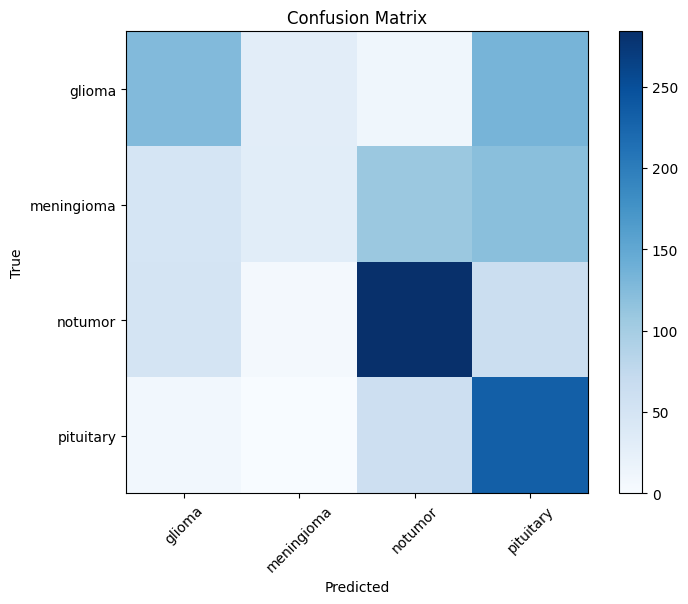

In [39]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# -----------------------------
# 1) HYPERPARAMETERS
# -----------------------------
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS_INITIAL = 10
EPOCHS_FINETUNE = 20

# -----------------------------
# 2) IMAGE GENERATORS
# -----------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.15
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# -----------------------------
# 3) CLASS WEIGHTS
# -----------------------------
classes = train_gen.classes
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(classes),
    y=classes
)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

# -----------------------------
# 4) MODEL
# -----------------------------
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# 5) CALLBACKS
# -----------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=3,
    verbose=1
)

# -----------------------------
# 6) INITIAL TRAINING
# -----------------------------
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS_INITIAL,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights
)

# -----------------------------
# 7) FINE-TUNING
# -----------------------------
for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_finetune = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS_FINETUNE,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights
)

# -----------------------------
# 8) EVALUATION
# -----------------------------
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Predict classes for test set
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_gen.classes

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=list(train_gen.class_indices.keys())))

# ROC-AUC (one-vs-rest)
roc_auc = roc_auc_score(pd.get_dummies(y_true), y_pred, multi_class='ovr')
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(train_gen.class_indices)), train_gen.class_indices.keys(), rotation=45)
plt.yticks(range(len(train_gen.class_indices)), train_gen.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# 🧠 EfficientNetB0 ile Görüntü Sınıflandırma Modeli
Bu notebook’ta, önceden eğitilmiş **EfficientNetB0** mimarisi kullanılarak bir görüntü sınıflandırma modeli oluşturulmaktadır.  
Aşamalar:
1. Hyperparametrelerin tanımlanması  
2. Görsel veri jeneratörlerinin oluşturulması  
3. Sınıf ağırlıklarının hesaplanması  
4. Modelin tanımlanması ve derlenmesi  
5. Callbacks tanımlanması  
6. İlk eğitim (base model donuk)  
7. Fine-tuning (bazı katmanlar açılarak)  
8. Değerlendirme ve metriklerin hesaplanması


## 1️⃣ Hiperparametreler
Modelde kullanılacak temel ayarlar burada belirlenir:
- `IMG_SIZE`: Görsellerin yeniden boyutlandırılacağı hedef boyut  
- `BATCH_SIZE`: Eğitimde kullanılacak mini-batch boyutu  
- `EPOCHS_INITIAL` ve `EPOCHS_FINETUNE`: Eğitim döngü sayıları


## 2️⃣ Görsel Jeneratörlerinin Hazırlanması
- **ImageDataGenerator** ile veriler normalize edilir.  
- Eğitim verileri için veri artırma (augmentation) teknikleri uygulanır.  
- Validation ve test verileri sadece normalize edilir.


## 3️⃣ Sınıf Ağırlıklarının Hesaplanması
Veri dengesizliği varsa, **class_weight** parametresi ile azınlık sınıflarına daha fazla ağırlık verilir.

## 4️⃣ Modelin Oluşturulması
- EfficientNetB0, ImageNet ağırlıklarıyla yüklenir.  
- Son katmanlar yerine, kendi problemimize uygun Dense katman eklenir.  
- İlk etapta temel model (base_model) dondurulur.

## 5️⃣ Callbacks Tanımlama
- **EarlyStopping**: Aşırı öğrenmeyi engeller.  
- **ReduceLROnPlateau**: Validasyon kaybı iyileşmiyorsa öğrenme oranını düşürür.

## 7️⃣ Fine-Tuning (Son Katmanların Açılması)
- Base modelin son 20 katmanı eğitime dahil edilir.  
- Daha düşük öğrenme oranı ile hassas ayar yapılır.

## 8️⃣ Değerlendirme
Modelin test seti üzerindeki performansı ölçülür:  
- Test doğruluğu  
- Sınıflandırma raporu  
- ROC-AUC skoru  
- Karışıklık matrisi (Confusion Matrix)



In [29]:
print(train_gen.class_indices)
print(val_gen.class_indices)
print(test_gen.class_indices)


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [30]:
print("Train samples:", train_gen.samples)
print("Validation samples:", val_gen.samples)


Train samples: 4857
Validation samples: 855
